[View in Colaboratory](https://colab.research.google.com/github/Oushesh/NamedEntityRecognition/blob/master/Hello,_Colaboratory.ipynb)

## Welcome to Colaboratory!

Colaboratory is a Google research project created to help disseminate machine learning education and research. It's a Jupyter notebook environment that requires no setup to use and runs entirely in the cloud.

Colaboratory notebooks are stored in [Google Drive](https://drive.google.com) and can be shared just as you would with Google Docs or Sheets. Colaboratory is free to use.

For more information, see our [FAQ](https://research.google.com/colaboratory/faq.html).

## Local runtime support

Colab also supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).

## Python 3

Colaboratory supports both Python2 and Python3 for code execution. 

* When creating a new notebook, you'll have the choice between Python 2 and Python 3.
* You can also change the language associated with a notebook; this information will be written into the `.ipynb` file itself, and thus will be preserved for future sessions.

In [1]:
import sys
print('Hello, Colaboratory from Python {}!'.format(sys.version_info[0]))

Hello, Colaboratory from Python 3!


In [2]:
%matplotlib inline

from matplotlib import pyplot as pl

In [4]:
!pip install plac

In [6]:
!pip install cytoolz

    100% |████████████████████████████████| 450kB 8.4MB/s 
    100% |████████████████████████████████| 51kB 18.5MB/s 
  Running setup.py bdist_wheel for cytoolz ... - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/88/f3/11/9817b001e59ab04889e8cffcbd9087e2e2155b9ebecfc8dd38
  Running setup.py bdist_wheel for toolz ... - \ done
  Stored in directory: /content/.cache/pip/wheels/f4/0c/f6/ce6b2d1aa459ee97cc3c0f82236302bd62d89c86c700219463
Successfully built cytoolz toolz


In [8]:
!pip install -U spacy

    100% |████████████████████████████████| 17.6MB 2.1MB/s 
Requirement not upgraded as not directly required: numpy>=1.7 in /usr/local/lib/python3.6/dist-packages (from spacy) (1.14.3)
    100% |████████████████████████████████| 92kB 21.5MB/s 
    100% |████████████████████████████████| 1.2MB 17.5MB/s 
Requirement not upgraded as not directly required: plac<1.0.0,>=0.9.6 in /usr/local/lib/python3.6/dist-packages (from spacy) (0.9.6)
    100% |████████████████████████████████| 51kB 17.1MB/s 
    100% |████████████████████████████████| 194kB 15.3MB/s 
    100% |████████████████████████████████| 71kB 19.1MB/s 
    100% |████████████████████████████████| 604kB 21.1MB/s 
    100% |████████████████████████████████| 51kB 16.4MB/s 
    100% |████████████████████████████████| 389kB 24.0MB/s 
Requirement not upgraded as not directly required: six<2.0.0,>=1.10.0 in /usr/local/lib/python3.6/dist-packages (from thinc<6.11.0,>=6.10.1->spacy) (1.11.0)
Requirement not upgraded as not directly require

 / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/fb/00/28/75c85d5135e7d9a100639137d1847d41e914ed16c962d467e4
  Running setup.py bdist_wheel for murmurhash ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/b8/94/a4/f69f8664cdc1098603df44771b7fec5fd1b3d8364cdd83f512
  Running setup.py bdist_wheel for cymem ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/55/8d/4a/f6328252aa2aaec0b1cb906fd96a1566d77f0f67701071ad13
  Running setup.py bdist_wheel for preshed ... - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/8f/85/06/2d132fb649a6bbcab22487e4147880a55b0dd0f4b18fdfd6b5
  Running setup.py bdist_wheel 

 | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/f8/b1/86/c92e4d36b690208fff8471711b85eaa6bc6d19860a86199a09
  Running setup.py bdist_wheel for msgpack-python ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/d5/de/86/7fa56fda12511be47ea0808f3502bc879df4e63ab168ec0406
Successfully built spacy murmurhash cymem preshed thinc pathlib ujson dill regex wrapt cytoolz msgpack-python
  Found existing installation: cytoolz 0.9.0.1
    Uninstalling cytoolz-0.9.0.1:
      Successfully uninstalled cytoolz-0.9.0.1


In [9]:
!python -m spacy download en_core_web_lg

    63% |████████████████████▏           | 537.9MB 74.3MB/s eta 0:00:05

    100% |████████████████████████████████| 852.3MB 60.7MB/s 
  Running setup.py install for en-core-web-lg ... - \ | / - \ | / - \ | / - \ done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_lg -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_lg

    You can now load the model via spacy.load('en_core_web_lg')



In [11]:
from __future__ import unicode_literals

from keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, Flatten, Conv1D, MaxPooling1D, Masking, Conv2D, MaxPool2D
from keras.initializers import RandomUniform
import plac
import collections
import random

from keras.utils import plot_model,Progbar

import pathlib
import cytoolz
import numpy
from keras.models import Sequential, Model, model_from_json
from keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, Flatten, Conv1D, MaxPool1D, Masking, Conv2D, MaxPool2D
from keras.layers import TimeDistributed
from keras.optimizers import Adam
#import cPickle as pickle
import pickle
from sklearn.preprocessing import OneHotEncoder

from collections import Counter, defaultdict

import spacy

from __future__ import print_function
from sklearn.model_selection import train_test_split
import os
import tqdm
import string
import pandas as pd
import numpy as np
from random import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector
from keras.utils import np_utils
from keras.preprocessing import text, sequence
import numpy as np
import io
import keras

import spacy

In [12]:

#Method to compute the accruarcy. Call predict_labels to get the labels for the dataset
def compute_f1(predictions, correct, idx2Label): 
    label_pred = []    
    for sentence in predictions:
        label_pred.append([idx2Label[element] for element in sentence])
        
    label_correct = []    
    for sentence in correct:
        label_correct.append([idx2Label[element] for element in sentence])
            
    
    #print label_pred
    #print label_correct
    
    prec = compute_precision(label_pred, label_correct)
    rec = compute_precision(label_correct, label_pred)
    
    f1 = 0
    if (rec+prec) > 0:
        f1 = 2.0 * prec * rec / (prec + rec);
        
    return prec, rec, f1

def compute_precision(guessed_sentences, correct_sentences):
    assert(len(guessed_sentences) == len(correct_sentences))
    correctCount = 0
    count = 0
    
    
    for sentenceIdx in range(len(guessed_sentences)):
        guessed = guessed_sentences[sentenceIdx]
        correct = correct_sentences[sentenceIdx]
        assert(len(guessed) == len(correct))
        idx = 0
        while idx < len(guessed):
            if guessed[idx][0] == 'B': #A new chunk starts
                count += 1
                
                if guessed[idx] == correct[idx]:
                    idx += 1
                    correctlyFound = True
                    
                    while idx < len(guessed) and guessed[idx][0] == 'I': #Scan until it no longer starts with I
                        if guessed[idx] != correct[idx]:
                            correctlyFound = False
                        
                        idx += 1
                    
                    if idx < len(guessed):
                        if correct[idx][0] == 'I': #The chunk in correct was longer
                            correctlyFound = False
                        
                    
                    if correctlyFound:
                        correctCount += 1
                else:
                    idx += 1
            else:  
                idx += 1
    
    precision = 0
    if count > 0:
        print(correctCount)
        precision = float(correctCount) / count
        
    return precision

In [13]:
nlp = spacy.load('en_core_web_lg')

In [14]:
def get_ner_bio(filex):
    sent_count = 0
    sent = []
    with io.open(filex, encoding='utf-8') as fl:
        for line in fl:
            line = line.strip()
            toks = line.split()
            #sentence break
            if len(toks)<1:
                if len(sent)>0:
                    sent_count+=1
                    if sent_count%100==0:
                        print(sent_count, sent)
                    res = sent
                    sent = []                   
                    yield res
                    
            #sentence start
            elif toks[0]==u'-DOCSTART-':
                sent=[]
            else:
                sent.append(toks[3]+' ')

In [15]:
max_length_sent=120
def get_ner_sentences(filex):
    sent_count = 0
    with io.open(filex, encoding='utf-8') as fl:
        for line in fl:
            line = line.strip()
            toks = line.split()
            #sentence break
            if len(toks)<1:
                if len(sent)>0:
                    sent_count+=1
                    if sent_count%1000==0:
                        print(sent_count, sent)
                    doc = nlp(sent)
                    sent= ""
                    yield doc
                    
            #sentence start
            elif toks[0]==u'-DOCSTART-':
                sent=""
            else:
                sent+=toks[0]+' '    
                
#train_docs = get_ner_sentences('eng.train')
#train_docs = list(train_docs)

In [16]:
!pip install wget

  Running setup.py bdist_wheel for wget ... - done
  Stored in directory: /content/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [17]:
import wget
urls = {"https://github.com/synalp/NER/raw/master/corpus/CoNLL-2003/eng.train",
        "https://github.com/synalp/NER/raw/master/corpus/CoNLL-2003/eng.testa",
        "https://github.com/synalp/NER/raw/master/corpus/CoNLL-2003/eng.testb"
       }

for url in urls:
    filename = wget.download(url)
    print(filename)

    
    

eng.train
eng.testb
eng.testa


In [32]:
filex='eng.train'
with io.open(filex, encoding='utf-8') as fl:
    text1=fl.read()
filex='eng.testb'
with io.open(filex, encoding='utf-8') as fl:
    text2=fl.read()

text = text1+text2
chars = sorted(list(set(text)))

print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars)) 

total chars: 88


In [33]:
def pad_hotencode_labels(train_labels, BIO_LABELS, max_length=150, bio=False): 
    if bio:
        LABELS = BIO_LABELS
        ent2id = dict(zip(LABELS, np.arange(len(LABELS))))
        train_encids = [[ent2id[i] for i in ents_list] for ents_list in train_labels ]
    else:
        LABELS = list(set([i.split('-')[-1] for i in BIO_LABELS]))
        ent2id = dict(zip(LABELS, np.arange(len(LABELS))))
        #train_encids = [[ent2id[i] for i in ents_list] for ents_list in train_labels ]
        train_encids = [[ent2id[i.split('-')[-1]] for i in ents_list] for ents_list in train_labels ]
            
    encoder = OneHotEncoder()
    encoder.fit(np.arange(len(LABELS)).reshape(len(LABELS),1))

    Xs = np.zeros((len(train_labels), max_length), dtype='int32')

    for i in range(len(train_encids)):
        sent=train_encids[i]
        for idx, enc in enumerate(sent):
            #print(idx)
            try:
                Xs[i, idx]=enc
            except:
                print(sent)
                
    tr = Xs.reshape(Xs.shape[0], Xs.shape[1], 1)
    tr_he = np.array([encoder.transform(tr[i,:,:]).toarray() for i in range(tr.shape[0])])
    return tr_he, ent2id

In [34]:
def get_embeddings(vocab):
    max_rank = max(lex.rank+1 for lex in vocab if lex.has_vector)
    vectors = numpy.ndarray((max_rank+1, vocab.vectors_length), dtype='float32')
    for lex in vocab:
        if lex.has_vector:
            vectors[lex.rank + 1] = lex.vector
    return vectors

In [35]:
def get_char_emb_features(docs, max_sentence_length=150, max_word_length=52):
    #docs = list(docs)
    Xs = numpy.zeros((len(docs), max_sentence_length, max_word_length), dtype='int32')
    for i, sentence in enumerate(docs):
        j = 0
        #print(len(sentence))
        for token in sentence:
            for char_id, char in enumerate(token.text):
                if char_id >= max_word_length:
                    break
                Xs[i,j,char_id] = char_indices[char]

            j += 1
    return Xs

# 0 = PADDING
# 1 = missing vector
def get_word_emb_features(docs, max_length):
    #docs = list(docs)
    Xs = numpy.zeros((len(docs), max_length), dtype='int32')
    for i, sentence in enumerate(docs):
        j = 0
        for token in sentence:
            #TODO: els add random vector with id=1 vector = np.random.uniform(-0.25, 0.25, len(split)-1)
            if token.has_vector and not token.is_punct and not token.is_space:
                Xs[i, j] = token.rank + 1
                j += 1
                if j >= max_length:
                    break
    return Xs    

In [36]:
# -*- coding: utf-8 -*-
from __future__ import absolute_import
"""
Author: Philipp Gross, https://github.com/phipleg/keras/blob/crf/keras/layers/crf.py
"""

from keras import backend as K
from keras import initializers, regularizers, constraints
from keras.engine import Layer, InputSpec


def path_energy(y, x, U, b_start=None, b_end=None, mask=None):
    """Calculates the energy of a tag path y for a given input x (with mask),
    transition energies U and boundary energies b_start, b_end."""
    x = add_boundary_energy(x, b_start, b_end, mask)
    return path_energy0(y, x, U, mask)


def path_energy0(y, x, U, mask=None):
    """Path energy without boundary potential handling."""
    n_classes = K.shape(x)[2]
    y_one_hot = K.one_hot(y, n_classes)

    # Tag path energy
    energy = K.sum(x * y_one_hot, 2)
    energy = K.sum(energy, 1)

    # Transition energy
    y_t = y[:, :-1]
    y_tp1 = y[:, 1:]
    U_flat = K.reshape(U, [-1])
    # Convert 2-dim indices (y_t, y_tp1) of U to 1-dim indices of U_flat:
    flat_indices = y_t * n_classes + y_tp1
    U_y_t_tp1 = K.gather(U_flat, flat_indices)

    if mask is not None:
        mask = K.cast(mask, K.floatx())
        y_t_mask = mask[:, :-1]
        y_tp1_mask = mask[:, 1:]
        U_y_t_tp1 *= y_t_mask * y_tp1_mask

    energy += K.sum(U_y_t_tp1, axis=1)

    return energy


def sparse_chain_crf_loss(y, x, U, b_start=None, b_end=None, mask=None):
    """Given the true sparsely encoded tag sequence y, input x (with mask),
    transition energies U, boundary energies b_start and b_end, it computes
    the loss function of a Linear Chain Conditional Random Field:
    loss(y, x) = NNL(P(y|x)), where P(y|x) = exp(E(y, x)) / Z.
    So, loss(y, x) = - E(y, x) + log(Z)
    Here, E(y, x) is the tag path energy, and Z is the normalization constant.
    The values log(Z) is also called free energy.
    """
    x = add_boundary_energy(x, b_start, b_end, mask)
    energy = path_energy0(y, x, U, mask)
    energy -= free_energy0(x, U, mask)
    return K.expand_dims(-energy, -1)


def chain_crf_loss(y, x, U, b_start=None, b_end=None, mask=None):
    """Variant of sparse_chain_crf_loss but with one-hot encoded tags y."""
    y_sparse = K.argmax(y, -1)
    y_sparse = K.cast(y_sparse, 'int32')
    return sparse_chain_crf_loss(y_sparse, x, U, b_start, b_end, mask)


def add_boundary_energy(x, b_start=None, b_end=None, mask=None):
    """Given the observations x, it adds the start boundary energy b_start (resp.
    end boundary energy b_end on the start (resp. end) elements and multiplies
    the mask."""
    if mask is None:
        if b_start is not None:
            x = K.concatenate([x[:, :1, :] + b_start, x[:, 1:, :]], axis=1)
        if b_end is not None:
            x = K.concatenate([x[:, :-1, :], x[:, -1:, :] + b_end], axis=1)
    else:
        mask = K.cast(mask, K.floatx())
        mask = K.expand_dims(mask, 2)
        x *= mask
        if b_start is not None:
            mask_r = K.concatenate([K.zeros_like(mask[:, :1]), mask[:, :-1]], axis=1)
            start_mask = K.cast(K.greater(mask, mask_r), K.floatx())
            x = x + start_mask * b_start
        if b_end is not None:
            mask_l = K.concatenate([mask[:, 1:], K.zeros_like(mask[:, -1:])], axis=1)
            end_mask = K.cast(K.greater(mask, mask_l), K.floatx())
            x = x + end_mask * b_end
    return x


def viterbi_decode(x, U, b_start=None, b_end=None, mask=None):
    """Computes the best tag sequence y for a given input x, i.e. the one that
    maximizes the value of path_energy."""
    x = add_boundary_energy(x, b_start, b_end, mask)

    alpha_0 = x[:, 0, :]
    gamma_0 = K.zeros_like(alpha_0)
    initial_states = [gamma_0, alpha_0]
    _, gamma = _forward(x,
                        lambda B: [K.cast(K.argmax(B, axis=1), K.floatx()), K.max(B, axis=1)],
                        initial_states,
                        U,
                        mask)
    y = _backward(gamma, mask)
    return y


def free_energy(x, U, b_start=None, b_end=None, mask=None):
    """Computes efficiently the sum of all path energies for input x, when
    runs over all possible tag sequences."""
    x = add_boundary_energy(x, b_start, b_end, mask)
    return free_energy0(x, U, mask)


def free_energy0(x, U, mask=None):
    """Free energy without boundary potential handling."""
    initial_states = [x[:, 0, :]]
    last_alpha, _ = _forward(x,
                             lambda B: [K.logsumexp(B, axis=1)],
                             initial_states,
                             U,
                             mask)
    return last_alpha[:, 0]


def _forward(x, reduce_step, initial_states, U, mask=None):
    """Forward recurrence of the linear chain crf."""

    def _forward_step(energy_matrix_t, states):
        alpha_tm1 = states[-1]
        new_states = reduce_step(K.expand_dims(alpha_tm1, 2) + energy_matrix_t)
        return new_states[0], new_states

    U_shared = K.expand_dims(K.expand_dims(U, 0), 0)

    if mask is not None:
        mask = K.cast(mask, K.floatx())
        mask_U = K.expand_dims(K.expand_dims(mask[:, :-1] * mask[:, 1:], 2), 3)
        U_shared = U_shared * mask_U

    inputs = K.expand_dims(x[:, 1:, :], 2) + U_shared
    inputs = K.concatenate([inputs, K.zeros_like(inputs[:, -1:, :, :])], axis=1)

    last, values, _ = K.rnn(_forward_step, inputs, initial_states)
    return last, values


def batch_gather(reference, indices):
    ref_shape = K.shape(reference)
    batch_size = ref_shape[0]
    n_classes = ref_shape[1]
    flat_indices = K.arange(0, batch_size) * n_classes + K.flatten(indices)
    return K.gather(K.flatten(reference), flat_indices)


def _backward(gamma, mask):
    """Backward recurrence of the linear chain crf."""
    gamma = K.cast(gamma, 'int32')

    def _backward_step(gamma_t, states):
        y_tm1 = K.squeeze(states[0], 0)
        y_t = batch_gather(gamma_t, y_tm1)
        return y_t, [K.expand_dims(y_t, 0)]

    initial_states = [K.expand_dims(K.zeros_like(gamma[:, 0, 0]), 0)]
    _, y_rev, _ = K.rnn(_backward_step,
                        gamma,
                        initial_states,
                        go_backwards=True)
    y = K.reverse(y_rev, 1)

    if mask is not None:
        mask = K.cast(mask, dtype='int32')
        # mask output
        y *= mask
        # set masked values to -1
        y += -(1 - mask)
    return y


class ChainCRF(Layer):
    """A Linear Chain Conditional Random Field output layer.
    It carries the loss function and its weights for computing
    the global tag sequence scores. While training it acts as
    the identity function that passes the inputs to the subsequently
    used loss function. While testing it applies Viterbi decoding
    and returns the best scoring tag sequence as one-hot encoded vectors.
    # Arguments
        init: weight initialization function for chain energies U.
            Can be the name of an existing function (str),
            or a Theano function (see: [initializers](../initializers.md)).
        U_regularizer: instance of [WeightRegularizer](../regularizers.md)
            (eg. L1 or L2 regularization), applied to the transition weight matrix.
        b_start_regularizer: instance of [WeightRegularizer](../regularizers.md),
            applied to the start bias b.
        b_end_regularizer: instance of [WeightRegularizer](../regularizers.md)
            module, applied to the end bias b.
        b_start_constraint: instance of the [constraints](../constraints.md)
            module, applied to the start bias b.
        b_end_constraint: instance of the [constraints](../constraints.md)
            module, applied to the end bias b.
        weights: list of Numpy arrays for initializing [U, b_start, b_end].
            Thus it should be a list of 3 elements of shape
            [(n_classes, n_classes), (n_classes, ), (n_classes, )]
    # Input shape
        3D tensor with shape `(nb_samples, timesteps, nb_classes)`, where
        ´timesteps >= 2`and `nb_classes >= 2`.
    # Output shape
        Same shape as input.
    # Masking
        This layer supports masking for input sequences of variable length.
    # Example
    ```python
    # As the last layer of sequential layer with
    # model.output_shape == (None, timesteps, nb_classes)
    crf = ChainCRF()
    model.add(crf)
    # now: model.output_shape == (None, timesteps, nb_classes)
    # Compile model with chain crf loss (and one-hot encoded labels) and accuracy
    model.compile(loss=crf.loss, optimizer='sgd', metrics=['accuracy'])
    # Alternatively, compile model with sparsely encoded labels and sparse accuracy:
    model.compile(loss=crf.sparse_loss, optimizer='sgd', metrics=['sparse_categorical_accuracy'])
    ```
    # Gotchas
    ## Model loading
    When you want to load a saved model that has a crf output, then loading
    the model with 'keras.models.load_model' won't work properly because
    the reference of the loss function to the transition parameters is lost. To
    fix this, you need to use the parameter 'custom_objects' as follows:
    ```python
    from keras.layer.crf import create_custom_objects:
    model = keras.models.load_model(filename, custom_objects=create_custom_objects())
    ```
    ## Temporal sample weights
    Given a ChainCRF instance crf both loss functions, crf.loss and crf.sparse_loss
    return a tensor of shape (batch_size, 1) and not (batch_size, maxlen).
    that sample weighting in temporal mode.
    """
    def __init__(self, init='glorot_uniform',
                 U_regularizer=None,
                 b_start_regularizer=None,
                 b_end_regularizer=None,
                 U_constraint=None,
                 b_start_constraint=None,
                 b_end_constraint=None,
                 weights=None,
                 **kwargs):
        super(ChainCRF, self).__init__(**kwargs)
        self.init = initializers.get(init)
        self.U_regularizer = regularizers.get(U_regularizer)
        self.b_start_regularizer = regularizers.get(b_start_regularizer)
        self.b_end_regularizer = regularizers.get(b_end_regularizer)
        self.U_constraint = constraints.get(U_constraint)
        self.b_start_constraint = constraints.get(b_start_constraint)
        self.b_end_constraint = constraints.get(b_end_constraint)

        self.initial_weights = weights

        self.supports_masking = True
        self.uses_learning_phase = True
        self.input_spec = [InputSpec(ndim=3)]

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 3
        return (input_shape[0], input_shape[1], input_shape[2])

    def compute_mask(self, input, mask=None):
        if mask is not None:
            return K.any(mask, axis=1)
        return mask

    def _fetch_mask(self):
        mask = None
        if self._inbound_nodes:
            mask = self._inbound_nodes[0].input_masks[0]
        return mask

    def build(self, input_shape):
        assert len(input_shape) == 3
        n_classes = input_shape[2]
        n_steps = input_shape[1]
        assert n_steps is None or n_steps >= 2
        self.input_spec = [InputSpec(dtype=K.floatx(),
                                     shape=(None, n_steps, n_classes))]

        self.U = self.add_weight((n_classes, n_classes),
                                 initializer=self.init,
                                 name='U',
                                 regularizer=self.U_regularizer,
                                 constraint=self.U_constraint)

        self.b_start = self.add_weight((n_classes, ),
                                       initializer='zero',
                                       name='b_start',
                                       regularizer=self.b_start_regularizer,
                                       constraint=self.b_start_constraint)

        self.b_end = self.add_weight((n_classes, ),
                                     initializer='zero',
                                     name='b_end',
                                     regularizer=self.b_end_regularizer,
                                     constraint=self.b_end_constraint)

        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights

        self.built = True

    def call(self, x, mask=None):
        y_pred = viterbi_decode(x, self.U, self.b_start, self.b_end, mask)
        nb_classes = self.input_spec[0].shape[2]
        y_pred_one_hot = K.one_hot(y_pred, nb_classes)
        return K.in_train_phase(x, y_pred_one_hot)

    def loss(self, y_true, y_pred):
        """Linear Chain Conditional Random Field loss function.
        """
        mask = self._fetch_mask()
        return chain_crf_loss(y_true, y_pred, self.U, self.b_start, self.b_end, mask)

    def sparse_loss(self, y_true, y_pred):
        """Linear Chain Conditional Random Field loss function with sparse
        tag sequences.
        """
        y_true = K.cast(y_true, 'int32')
        y_true = K.squeeze(y_true, 2)
        mask = self._fetch_mask()
        return sparse_chain_crf_loss(y_true, y_pred, self.U, self.b_start, self.b_end, mask)

    def get_config(self):
        config = {
            'init': initializers.serialize(self.init),
            'U_regularizer': regularizers.serialize(self.U_regularizer),
            'b_start_regularizer': regularizers.serialize(self.b_start_regularizer),
            'b_end_regularizer': regularizers.serialize(self.b_end_regularizer),
            'U_constraint': constraints.serialize(self.U_constraint),
            'b_start_constraint': constraints.serialize(self.b_start_constraint),
            'b_end_constraint': constraints.serialize(self.b_end_constraint)
        }
        base_config = super(ChainCRF, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


def create_custom_objects():
    """Returns the custom objects, needed for loading a persisted model."""
    instanceHolder = {'instance': None}

    class ClassWrapper(ChainCRF):
        def __init__(self, *args, **kwargs):
            instanceHolder['instance'] = self
            super(ClassWrapper, self).__init__(*args, **kwargs)

    def loss(*args):
        method = getattr(instanceHolder['instance'], 'loss')
        return method(*args)

    def sparse_loss(*args):
        method = getattr(instanceHolder['instance'], 'sparse_loss')
        return method(*args)

    return {'ChainCRF': ClassWrapper, 'loss': loss, 'sparse_loss': sparse_loss}


In [37]:
from keras.optimizers import Nadam
word_embeddings = get_embeddings(nlp.vocab)
words_input = Input(shape=(None,),dtype='int32',name='words_input')
words = Embedding(input_dim=word_embeddings.shape[0], 
                  output_dim=word_embeddings.shape[1], 
                  weights=[word_embeddings], 
                  trainable=False)(words_input)

#output of the Embedding layer will be a 3D tensor of shape (samples, sequence_length, embedding_dim).
character_input=Input(shape=(None,52,),name='char_input')
embed_char_out=TimeDistributed(Embedding(len(char_indices),100,
                                         embeddings_initializer=RandomUniform(minval=-0.5, maxval=0.5)), #maybe change from 0 to 1
                                         name='char_embedding')(character_input)

dropout= Dropout(0.5)(embed_char_out)
conv1d_out= TimeDistributed(Conv1D(kernel_size=3, filters=30, padding='same',activation='tanh', strides=1))(dropout) #extra convolutional Network
maxpool_out=TimeDistributed(MaxPooling1D(52))(conv1d_out)
char = TimeDistributed(Flatten())(maxpool_out)
char = Dropout(0.5)(char)
output = keras.layers.concatenate([words, char]) #concatenation of words and chars to char_embeddings
context_rep = Bidirectional(LSTM(2*100, return_sequences=True, dropout=0.50, recurrent_dropout=0.25))(output)
#ntime_steps = tf.shape(context_rep)[1]
#len(ent2id)=9
output = Dense(100, activation='softmax')(context_rep)
output = Dense(9)(output)

#output = TimeDistributed(Dense(9, activation='softmax'))(context_rep)

#Add Chain CRF Layer here:
crf=ChainCRF()
pred=crf(output)

#Concatenate both inputs together
#sequence_lengths = Input(batch_shape=(None, 1), dtype='int32')
model = Model(inputs=[words_input, character_input], outputs=[pred]) #accepts 1 Batch at a time
model.compile(loss=crf.loss,optimizer=Nadam(lr=0.001),metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001), metrics=['categorical_accuracy'])
model.summary()

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         (None, None, 52)     0                                            
__________________________________________________________________________________________________
char_embedding (TimeDistributed (None, None, 52, 100 8800        char_input[0][0]                 
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, None, 52, 100 0           char_embedding[0][0]             
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, None, 52, 30) 9030        dropout_1[0][0]                  
__________________________

In [38]:
#Check shapes of array
output.shape

TensorShape([Dimension(None), Dimension(None), Dimension(9)])

In [39]:
pred.shape

TensorShape([Dimension(None), Dimension(None), Dimension(9)])

In [40]:
model.fit([train_word, train_char], train_labels,batch_size=20, epochs=20,callbacks=[metrics])

NameError: ignored

In [45]:
from google.colab import files

train_char = files.upload('train_char.npy')
train_word = files.upload('train_word.npy')
train_labels = files.upload('train_labels.npy')

TypeError: ignored

In [0]:
train_labels = np.load('train_labels.npy')
train_word = np.load('train_word.npy')
train_char = np.load('train_char.npy')

## TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
import tensorflow as tf
import numpy as np

with tf.Session():
  input1 = tf.constant(1.0, shape=[2, 3])
  input2 = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
  output = tf.add(input1, input2)
  result = output.eval()

result

array([[ 2.,  3.,  4.],
       [ 5.,  6.,  7.]], dtype=float32)

## Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

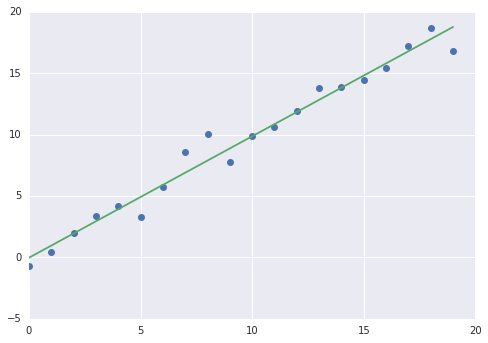

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb)

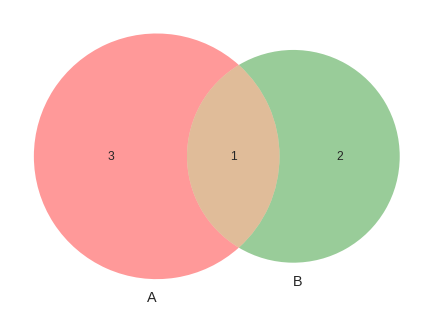

In [0]:
# Only needs to be run once at the top of the notebook.
!pip install -q matplotlib-venn

# Now the newly-installed library can be used anywhere else in the notebook.
from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

# Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


# For more information:
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Markdown guide](/notebooks/markdown_guide.ipynb)
- [Charts](/notebooks/charts.ipynb)
- [Widgets](/notebooks/widgets.ipynb)
- [Loading and saving data: local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Example Google Cloud BigQuery notebook](/notebooks/bigquery.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [Forms](/notebooks/forms.ipynb)